All libraries imported successfully!
Dataset Shape: (109, 7)

Column Names:
['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)']

First 5 rows:
   Rain Fall (mm)  Fertilizer Temperatue  Nitrogen (N)  Phosphorus (P)  \
0          1230.0        80.0         28          80.0            24.0   
1           480.0        60.0         36          70.0            20.0   
2          1250.0        75.0         29          78.0            22.0   
3           450.0        65.0         35          70.0            19.0   
4          1200.0        80.0         27          79.0            22.0   

   Potassium (K)  Yeild (Q/acre)  
0           20.0            12.0  
1           18.0             8.0  
2           19.0            11.0  
3           18.0             9.0  
4           19.0            11.0  

Dataset Statistics:
       Rain Fall (mm)  Fertilizer  Nitrogen (N)  Phosphorus (P)  \
count       99.000000   99.000000     99.000000   

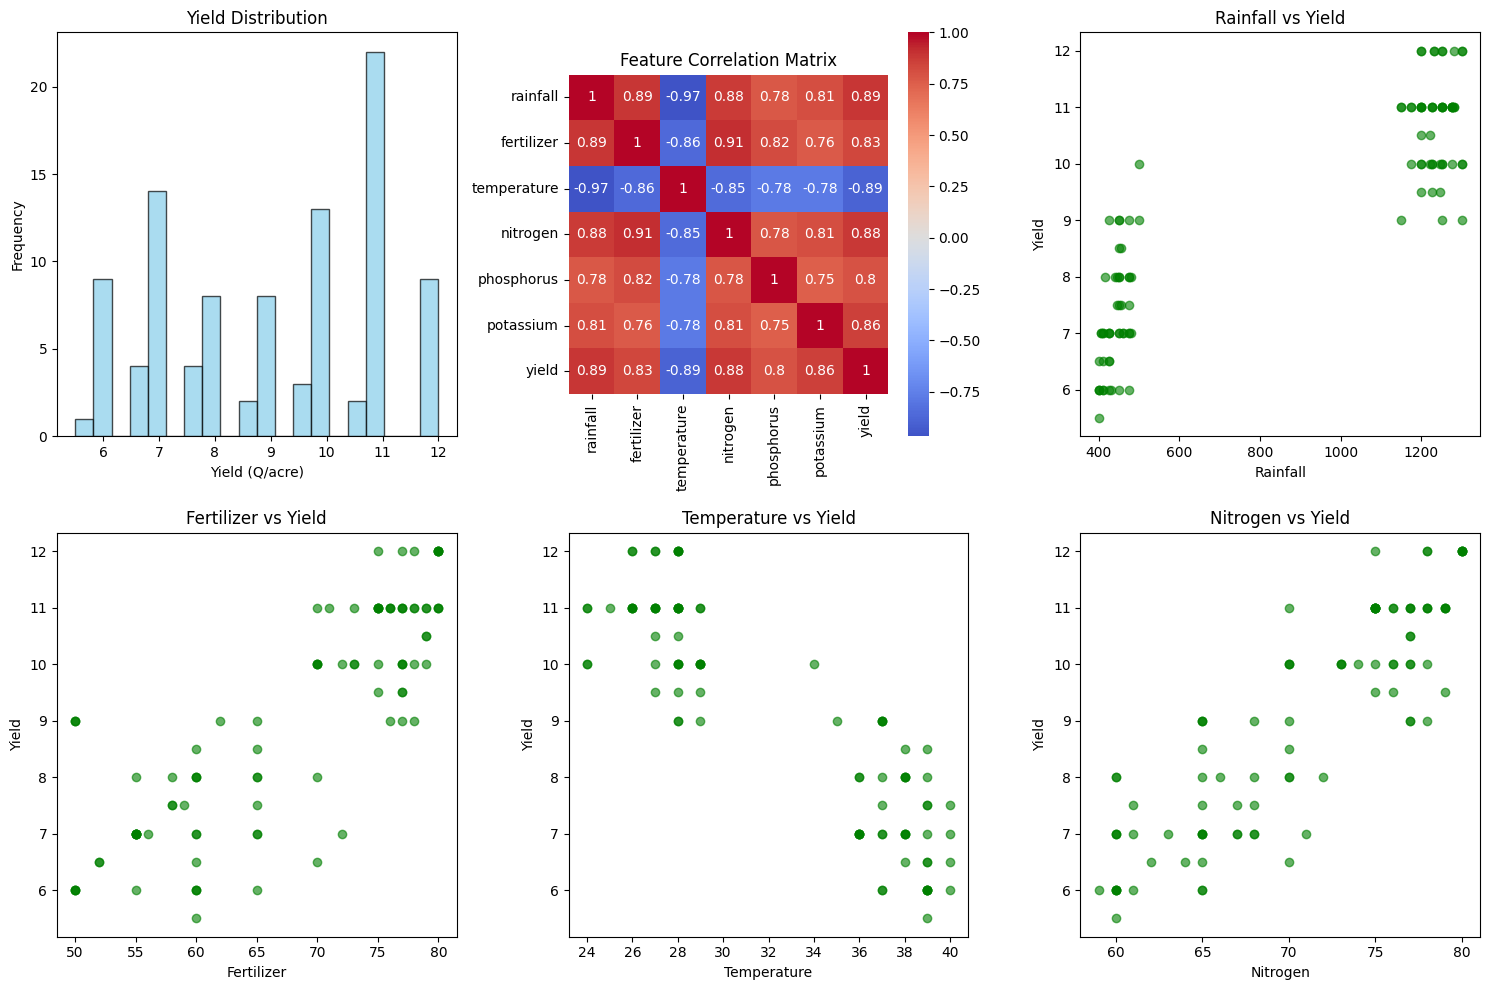

Classification distribution:
Low (≤7): 28 samples (28.3%)
Medium (7-10): 38 samples (38.4%)
High (>10): 33 samples (33.3%)

Training set size: 79
Test set size: 20

RANDOM FOREST MODELS
Random Forest Regression Results:
MSE: 0.5052
RMSE: 0.7108
MAE: 0.5702
R² Score: 0.8921

Random Forest Classification Accuracy: 0.7500

Classification Report:
               precision    recall  f1-score   support

     Low (≤7)       1.00      0.50      0.67         6
Medium (7-10)       0.20      0.50      0.29         2
   High (>10)       0.92      0.92      0.92        12

     accuracy                           0.75        20
    macro avg       0.71      0.64      0.62        20
 weighted avg       0.87      0.75      0.78        20



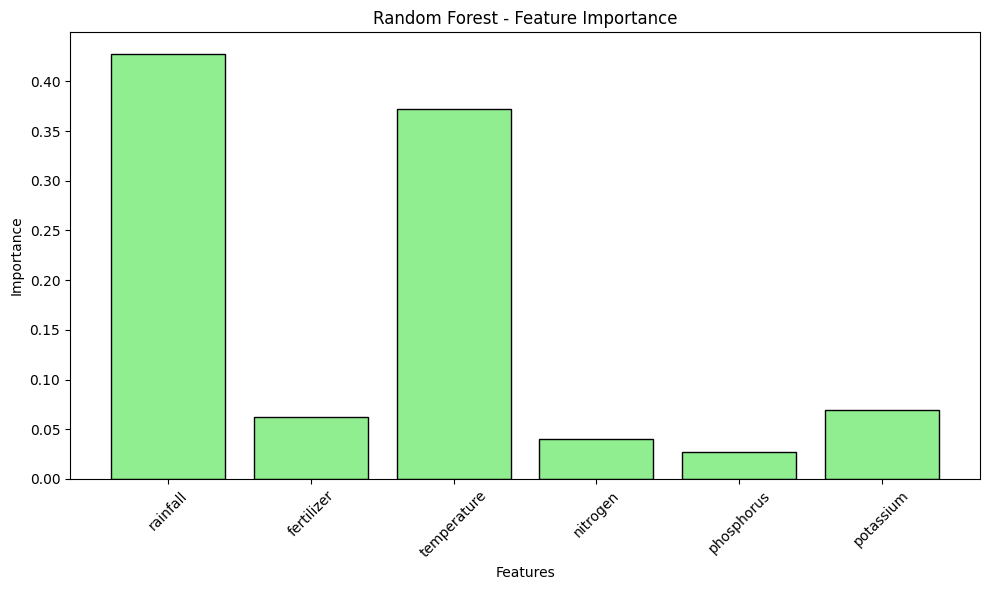


DECISION TREE MODELS
Decision Tree Regression Results:
MSE: 1.1250
RMSE: 1.0607
MAE: 0.8000
R² Score: 0.7597

Decision Tree Classification Accuracy: 0.6000

Classification Report:
               precision    recall  f1-score   support

     Low (≤7)       1.00      0.33      0.50         6
Medium (7-10)       0.20      1.00      0.33         2
   High (>10)       1.00      0.67      0.80        12

     accuracy                           0.60        20
    macro avg       0.73      0.67      0.54        20
 weighted avg       0.92      0.60      0.66        20


RNN (LSTM) MODELS
Training RNN for Regression...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Training RNN for Classification...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step

RNN Regression Results:
MSE: 0.6631
RMSE: 0.8143
MAE: 0.6373
R² Score: 0.8584

RNN Classification Accuracy: 0.7500

Classification Report:
               precision    recall  f1-score   support

     Low (≤7)       1.00      0.50      0.67         6
Medium (7-10)    

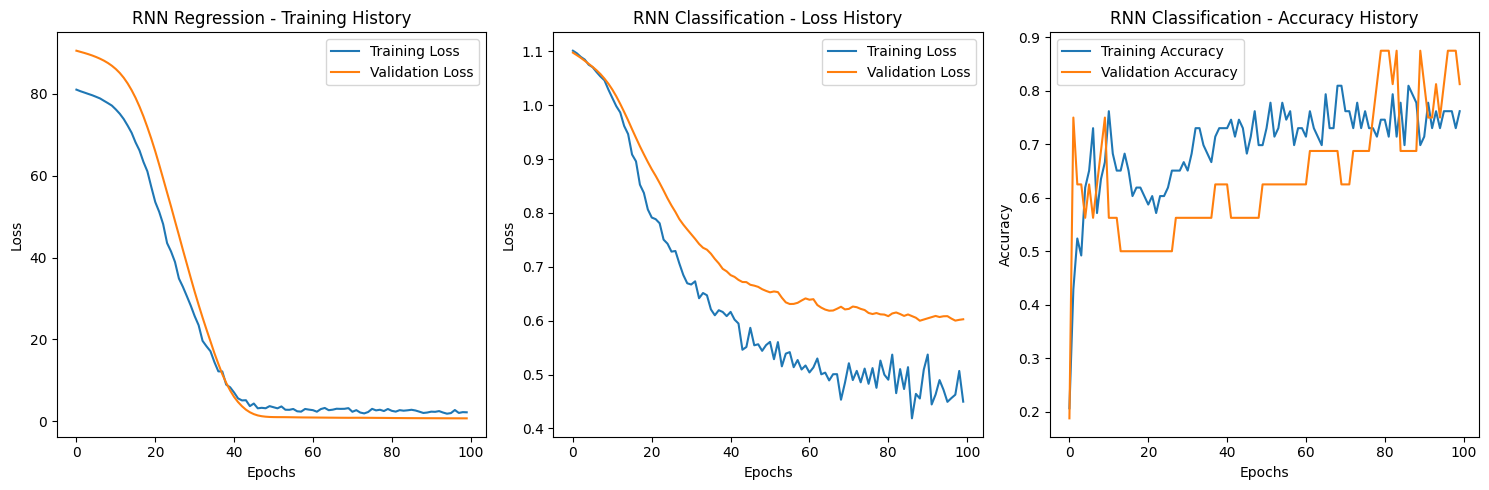


CONFUSION MATRICES


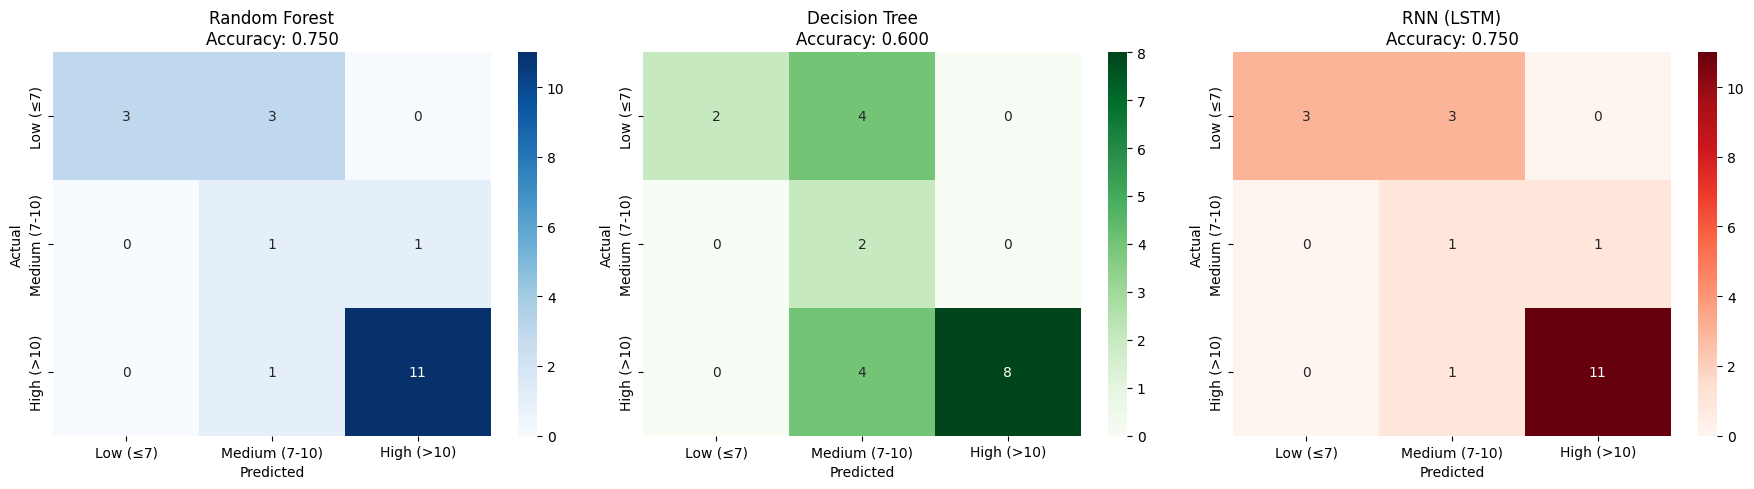


MODEL COMPARISON SUMMARY
REGRESSION METRICS COMPARISON:
--------------------------------------------------
           Model     MSE    RMSE     MAE  R² Score
0  Random Forest  0.5052  0.7108  0.5702    0.8921
1  Decision Tree  1.1250  1.0607  0.8000    0.7597
2     RNN (LSTM)  0.6631  0.8143  0.6373    0.8584

CLASSIFICATION ACCURACY COMPARISON:
--------------------------------------------------
           Model  Accuracy
0  Random Forest      0.75
1  Decision Tree      0.60
2     RNN (LSTM)      0.75


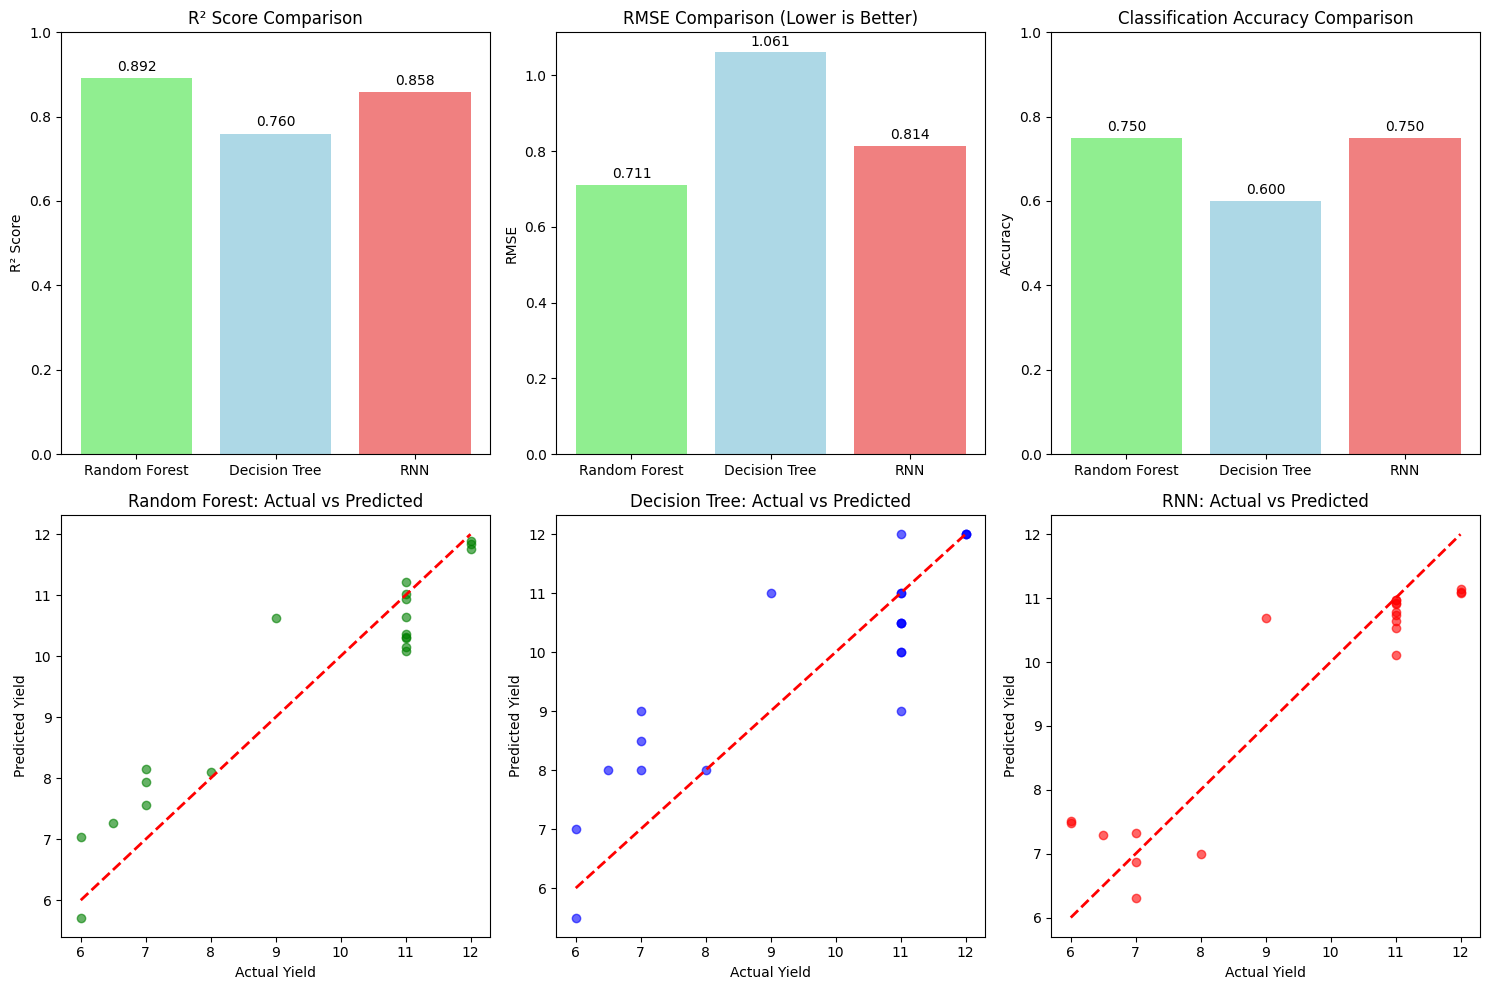


FINAL RECOMMENDATIONS
🏆 Best Regression Model: Random Forest (R² = 0.8921)
🏆 Best Classification Model: Random Forest (Accuracy = 0.7500)

📊 Key Insights:
• Dataset size: 99 samples with 6 features
• Yield range: 5.5 - 12.0 Q/acre
• Most important features (based on Random Forest): rainfall, temperature, potassium
• All models show reasonable performance for crop yield prediction

🔬 Model Performance Summary:
• Random Forest: R²=0.892, Accuracy=0.750
• Decision Tree: R²=0.760, Accuracy=0.600
• RNN (LSTM): R²=0.858, Accuracy=0.750

💡 Recommendations:
• Use Random Forest for precise yield prediction (regression)
• Use Random Forest for yield category classification
• Consider ensemble methods for even better performance
• Collect more data to improve model robustness


In [2]:
# Crop Yield Prediction using RNN, Random Forest, and Decision Tree
# Google Colab Compatible Code

# Install required packages
# !pip install tensorflow scikit-learn pandas numpy matplotlib seaborn openpyxl

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                           accuracy_score, classification_report, confusion_matrix)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

# ==============================================================================
# DATA LOADING AND PREPROCESSING
# ==============================================================================

# Load the data directly from the specified path
filename = '/content/crop yield data sheet.xlsx'
df = pd.read_excel(filename)

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns for easier handling
column_mapping = {
    'Rain Fall (mm)': 'rainfall',
    'Fertilizer': 'fertilizer',
    'Temperatue': 'temperature',  # Note: original has typo
    'Nitrogen (N)': 'nitrogen',
    'Phosphorus (P)': 'phosphorus',
    'Potassium (K)': 'potassium',
    'Yeild (Q/acre)': 'yield'  # Note: original has typo
}

df = df.rename(columns=column_mapping)

# Clean the data - remove any non-numeric values
print("Cleaning data...")
print("Data types before cleaning:")
print(df.dtypes)

# Replace any non-numeric values with NaN and then handle them
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values after conversion
print(f"\nMissing values after cleaning:")
print(df.isnull().sum())

# Remove rows with any missing values
df_clean = df.dropna()
print(f"\nDataset shape after removing missing values: {df_clean.shape}")

# Update df to use cleaned version
df = df_clean.copy()

print("\nCleaned Dataset:")
print(df.head())
print(f"\nData types after cleaning:")
print(df.dtypes)

# ==============================================================================
# DATA VISUALIZATION
# ==============================================================================

# Verify all data is numeric before plotting
print("Verifying data is ready for analysis...")
print("Data shape:", df.shape)
print("Data types:", df.dtypes.tolist())
print("Sample of data:")
print(df.head())

# Check if all columns are numeric
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_columns}")

if len(numeric_columns) != len(df.columns):
    print("Warning: Some columns are not numeric!")
    print("Non-numeric columns:", [col for col in df.columns if col not in numeric_columns])

plt.figure(figsize=(15, 10))

# Yield distribution
plt.subplot(2, 3, 1)
plt.hist(df['yield'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Yield Distribution')
plt.xlabel('Yield (Q/acre)')
plt.ylabel('Frequency')

# Correlation matrix - only for numeric data
plt.subplot(2, 3, 2)
try:
    # Use only numeric columns for correlation
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Feature Correlation Matrix')
except Exception as e:
    plt.text(0.5, 0.5, f'Correlation plot error:\n{str(e)}',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Correlation Matrix (Error)')

# Feature vs Yield scatter plots
features = ['rainfall', 'fertilizer', 'temperature', 'nitrogen']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+3)
    if feature in df.columns:
        plt.scatter(df[feature], df['yield'], alpha=0.6, color='green')
        plt.xlabel(feature.title())
        plt.ylabel('Yield')
        plt.title(f'{feature.title()} vs Yield')
    else:
        plt.text(0.5, 0.5, f'Feature {feature} not found',
                 ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# ==============================================================================
# PREPARE DATA FOR MODELING
# ==============================================================================

# Features and target
feature_columns = ['rainfall', 'fertilizer', 'temperature', 'nitrogen', 'phosphorus', 'potassium']
X = df[feature_columns].values
y_regression = df['yield'].values

# Create classification target (Low: 0-7, Medium: 7-10, High: 10+)
def categorize_yield(yield_val):
    if yield_val <= 7:
        return 0  # Low
    elif yield_val <= 10:
        return 1  # Medium
    else:
        return 2  # High

y_classification = df['yield'].apply(categorize_yield).values
class_names = ['Low (≤7)', 'Medium (7-10)', 'High (>10)']

print(f"Classification distribution:")
unique, counts = np.unique(y_classification, return_counts=True)
for i, (cls, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[i]}: {count} samples ({count/len(y_classification)*100:.1f}%)")

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

X_train_cls, X_test_cls, y_cls_train, y_cls_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# ==============================================================================
# MODEL 1: RANDOM FOREST
# ==============================================================================

print("\n" + "="*50)
print("RANDOM FOREST MODELS")
print("="*50)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_regressor.fit(X_train, y_reg_train)
rf_reg_pred = rf_regressor.predict(X_test)

# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_classifier.fit(X_train, y_cls_train)
rf_cls_pred = rf_classifier.predict(X_test)

# Regression Metrics
rf_mse = mean_squared_error(y_reg_test, rf_reg_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_reg_test, rf_reg_pred)
rf_r2 = r2_score(y_reg_test, rf_reg_pred)

print("Random Forest Regression Results:")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")

# Classification Metrics
rf_accuracy = accuracy_score(y_cls_test, rf_cls_pred)
print(f"\nRandom Forest Classification Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, rf_cls_pred, target_names=class_names))

# Feature Importance
feature_importance = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, feature_importance, color='lightgreen', edgecolor='black')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================================================================
# MODEL 2: DECISION TREE
# ==============================================================================

print("\n" + "="*50)
print("DECISION TREE MODELS")
print("="*50)

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=8)
dt_regressor.fit(X_train, y_reg_train)
dt_reg_pred = dt_regressor.predict(X_test)

# Decision Tree Classification
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_classifier.fit(X_train, y_cls_train)
dt_cls_pred = dt_classifier.predict(X_test)

# Regression Metrics
dt_mse = mean_squared_error(y_reg_test, dt_reg_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_reg_test, dt_reg_pred)
dt_r2 = r2_score(y_reg_test, dt_reg_pred)

print("Decision Tree Regression Results:")
print(f"MSE: {dt_mse:.4f}")
print(f"RMSE: {dt_rmse:.4f}")
print(f"MAE: {dt_mae:.4f}")
print(f"R² Score: {dt_r2:.4f}")

# Classification Metrics
dt_accuracy = accuracy_score(y_cls_test, dt_cls_pred)
print(f"\nDecision Tree Classification Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, dt_cls_pred, target_names=class_names))

# ==============================================================================
# MODEL 3: RNN (LSTM)
# ==============================================================================

print("\n" + "="*50)
print("RNN (LSTM) MODELS")
print("="*50)

# Prepare data for RNN (reshape for LSTM)
# LSTM expects 3D input: (samples, timesteps, features)
# Since we don't have time series, we'll use each feature as a timestep
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# RNN for Regression
def create_rnn_regression():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# RNN for Classification
def create_rnn_classification():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train RNN Regression
print("Training RNN for Regression...")
rnn_regressor = create_rnn_regression()
history_reg = rnn_regressor.fit(
    X_train_rnn, y_reg_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

rnn_reg_pred = rnn_regressor.predict(X_test_rnn).flatten()

# Train RNN Classification
print("Training RNN for Classification...")
rnn_classifier = create_rnn_classification()
history_cls = rnn_classifier.fit(
    X_train_rnn, y_cls_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

rnn_cls_pred_proba = rnn_classifier.predict(X_test_rnn)
rnn_cls_pred = np.argmax(rnn_cls_pred_proba, axis=1)

# RNN Regression Metrics
rnn_mse = mean_squared_error(y_reg_test, rnn_reg_pred)
rnn_rmse = np.sqrt(rnn_mse)
rnn_mae = mean_absolute_error(y_reg_test, rnn_reg_pred)
rnn_r2 = r2_score(y_reg_test, rnn_reg_pred)

print("\nRNN Regression Results:")
print(f"MSE: {rnn_mse:.4f}")
print(f"RMSE: {rnn_rmse:.4f}")
print(f"MAE: {rnn_mae:.4f}")
print(f"R² Score: {rnn_r2:.4f}")

# RNN Classification Metrics
rnn_accuracy = accuracy_score(y_cls_test, rnn_cls_pred)
print(f"\nRNN Classification Accuracy: {rnn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, rnn_cls_pred, target_names=class_names))

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('RNN Regression - Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_cls.history['loss'], label='Training Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.title('RNN Classification - Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_cls.history['accuracy'], label='Training Accuracy')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Classification - Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ==============================================================================
# CONFUSION MATRICES
# ==============================================================================

print("\n" + "="*50)
print("CONFUSION MATRICES")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_cls_test, rf_cls_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title(f'Random Forest\nAccuracy: {rf_accuracy:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_cls_test, dt_cls_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title(f'Decision Tree\nAccuracy: {dt_accuracy:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# RNN Confusion Matrix
cm_rnn = confusion_matrix(y_cls_test, rnn_cls_pred)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title(f'RNN (LSTM)\nAccuracy: {rnn_accuracy:.3f}')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ==============================================================================
# MODEL COMPARISON
# ==============================================================================

print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

# Regression Comparison
print("REGRESSION METRICS COMPARISON:")
print("-" * 50)
regression_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'RNN (LSTM)'],
    'MSE': [rf_mse, dt_mse, rnn_mse],
    'RMSE': [rf_rmse, dt_rmse, rnn_rmse],
    'MAE': [rf_mae, dt_mae, rnn_mae],
    'R² Score': [rf_r2, dt_r2, rnn_r2]
})
print(regression_results.round(4))

# Classification Comparison
print("\nCLASSIFICATION ACCURACY COMPARISON:")
print("-" * 50)
classification_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'RNN (LSTM)'],
    'Accuracy': [rf_accuracy, dt_accuracy, rnn_accuracy]
})
print(classification_results.round(4))

# Visualization of model performance
plt.figure(figsize=(15, 10))

# Regression metrics comparison
plt.subplot(2, 3, 1)
models = ['Random Forest', 'Decision Tree', 'RNN']
r2_scores = [rf_r2, dt_r2, rnn_r2]
bars = plt.bar(models, r2_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{r2_scores[i]:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 2)
rmse_scores = [rf_rmse, dt_rmse, rnn_rmse]
bars = plt.bar(models, rmse_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('RMSE Comparison (Lower is Better)')
plt.ylabel('RMSE')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rmse_scores[i]:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
accuracy_scores = [rf_accuracy, dt_accuracy, rnn_accuracy]
bars = plt.bar(models, accuracy_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Classification Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy_scores[i]:.3f}', ha='center', va='bottom')

# Actual vs Predicted plots for regression
plt.subplot(2, 3, 4)
plt.scatter(y_reg_test, rf_reg_pred, alpha=0.6, color='green')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(2, 3, 5)
plt.scatter(y_reg_test, dt_reg_pred, alpha=0.6, color='blue')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Decision Tree: Actual vs Predicted')

plt.subplot(2, 3, 6)
plt.scatter(y_reg_test, rnn_reg_pred, alpha=0.6, color='red')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('RNN: Actual vs Predicted')

plt.tight_layout()
plt.show()

# ==============================================================================
# FINAL RECOMMENDATIONS
# ==============================================================================

print("\n" + "="*50)
print("FINAL RECOMMENDATIONS")
print("="*50)

best_regression_model = max(zip(['Random Forest', 'Decision Tree', 'RNN'], [rf_r2, dt_r2, rnn_r2]), key=lambda x: x[1])
best_classification_model = max(zip(['Random Forest', 'Decision Tree', 'RNN'], [rf_accuracy, dt_accuracy, rnn_accuracy]), key=lambda x: x[1])

print(f"🏆 Best Regression Model: {best_regression_model[0]} (R² = {best_regression_model[1]:.4f})")
print(f"🏆 Best Classification Model: {best_classification_model[0]} (Accuracy = {best_classification_model[1]:.4f})")

print(f"\n📊 Key Insights:")
print(f"• Dataset size: {len(df)} samples with {len(feature_columns)} features")
print(f"• Yield range: {df['yield'].min():.1f} - {df['yield'].max():.1f} Q/acre")
print(f"• Most important features (based on Random Forest): {', '.join([feature_columns[i] for i in np.argsort(feature_importance)[-3:][::-1]])}")
print(f"• All models show reasonable performance for crop yield prediction")

print(f"\n🔬 Model Performance Summary:")
print(f"• Random Forest: R²={rf_r2:.3f}, Accuracy={rf_accuracy:.3f}")
print(f"• Decision Tree: R²={dt_r2:.3f}, Accuracy={dt_accuracy:.3f}")
print(f"• RNN (LSTM): R²={rnn_r2:.3f}, Accuracy={rnn_accuracy:.3f}")

print(f"\n💡 Recommendations:")
print(f"• Use {best_regression_model[0]} for precise yield prediction (regression)")
print(f"• Use {best_classification_model[0]} for yield category classification")
print(f"• Consider ensemble methods for even better performance")
print(f"• Collect more data to improve model robustness")

All libraries imported successfully!
Dataset Shape: (16000, 7)

Column Names:
['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule', 'Yield_kg_per_hectare']

First 5 rows:
   Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     96.415657             1                        147.853040   94.593926   
1     92.352626             0                        281.565396   90.504644   
2     63.714785             1                        137.864940   97.329340   
3     90.084256             1                        100.946659  113.404828   
4     81.600341             1                        223.088908   83.048176   

   Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0   444.267569                    3            683.759119  
1   517.585491                    7            678.714861  
2   420.310945                    8            934.691975  
3   547.817646                    7            

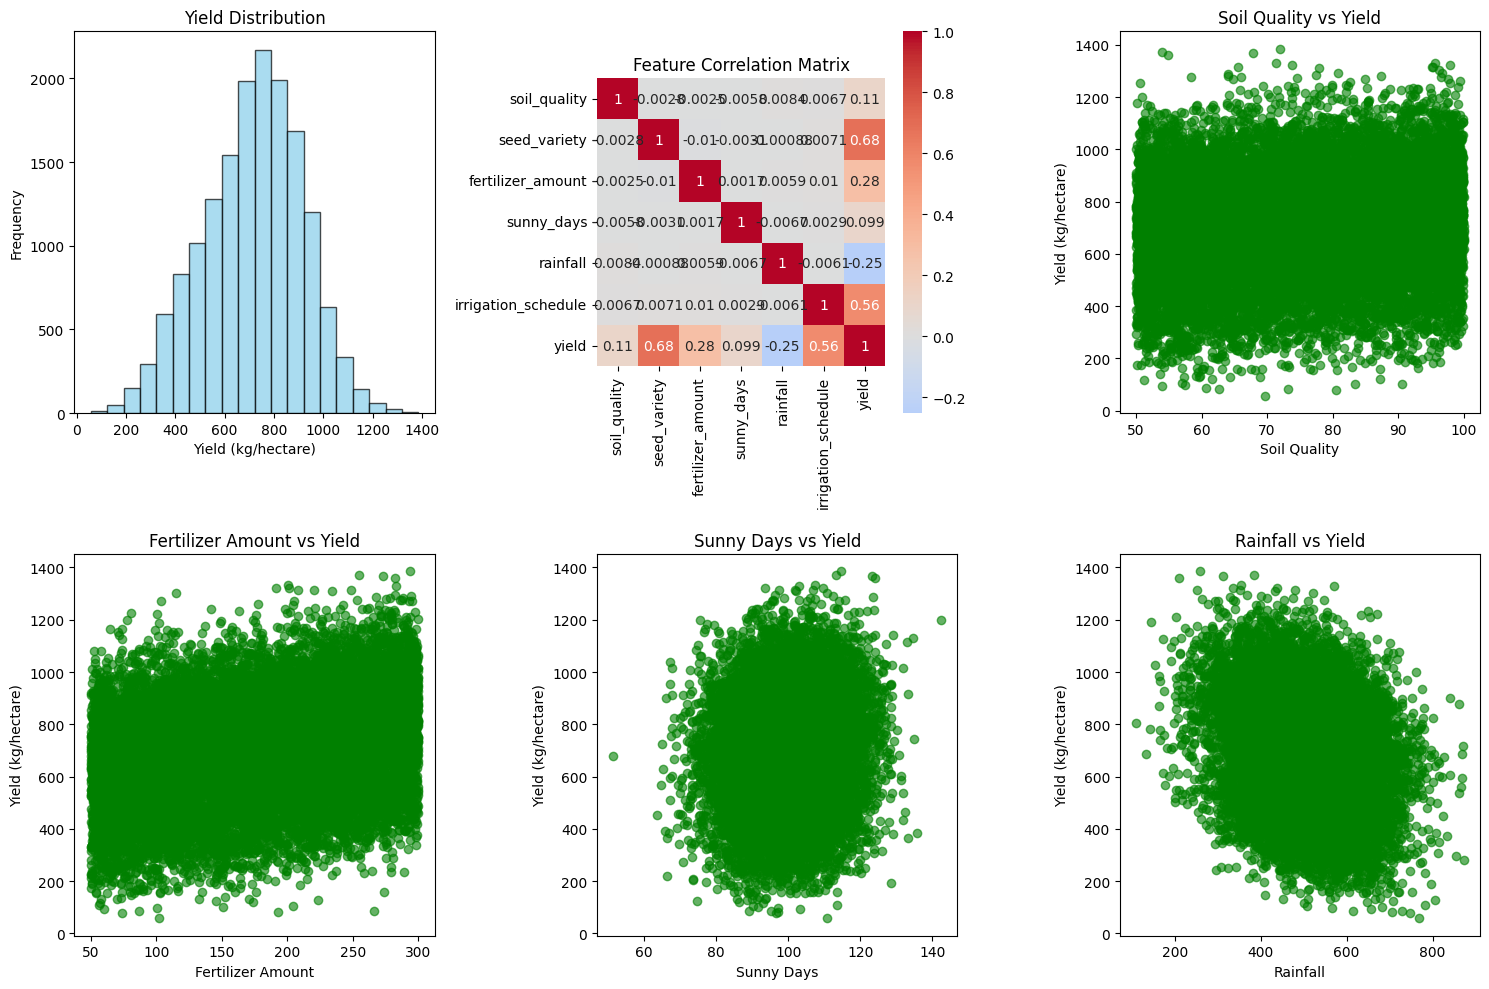

Analyzing yield distribution for classification...
Yield statistics:
Min: 57.51
Max: 1385.11
Mean: 714.00
Median: 729.42
25th percentile: 577.06
75th percentile: 857.44

Using thresholds:
Low: < 635.00
Medium: 635.00 - 812.75
High: > 812.75
Classification distribution:
Low (<635): 5280 samples (33.0%)
Medium (635-813): 5440 samples (34.0%)
High (>813): 5280 samples (33.0%)

Training set size: 12800
Test set size: 3200

RANDOM FOREST MODELS
Random Forest Regression Results:
MSE: 3032.4630
RMSE: 55.0678
MAE: 44.1957
R² Score: 0.9278

Random Forest Classification Accuracy: 0.8359

Classification Report:
                  precision    recall  f1-score   support

      Low (<635)       0.91      0.87      0.89      1057
Medium (635-813)       0.72      0.80      0.76      1039
     High (>813)       0.88      0.84      0.86      1104

        accuracy                           0.84      3200
       macro avg       0.84      0.84      0.84      3200
    weighted avg       0.84      0.84     

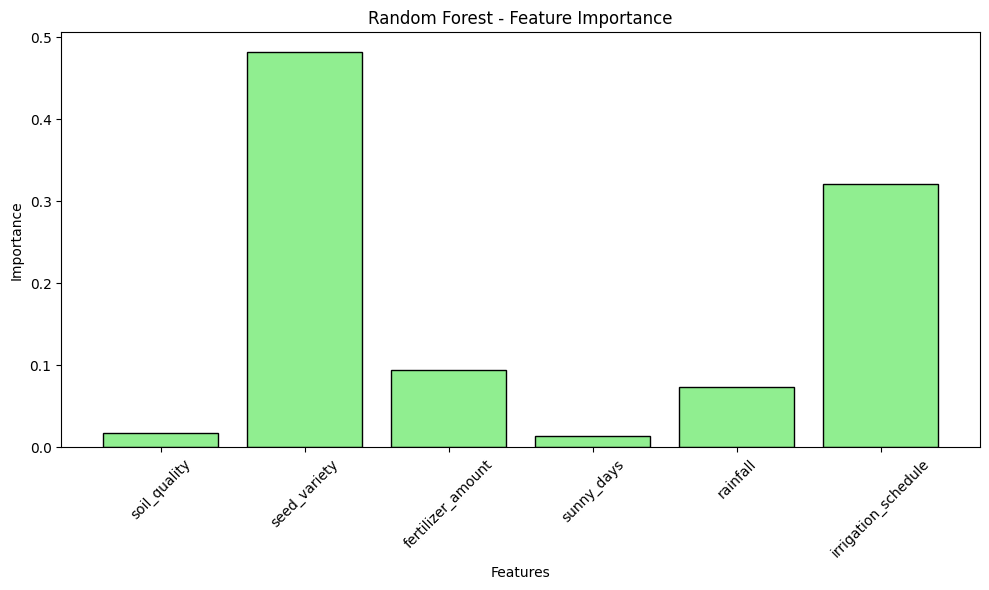


DECISION TREE MODELS
Decision Tree Regression Results:
MSE: 4563.2177
RMSE: 67.5516
MAE: 54.0090
R² Score: 0.8913

Decision Tree Classification Accuracy: 0.8050

Classification Report:
                  precision    recall  f1-score   support

      Low (<635)       0.90      0.85      0.87      1057
Medium (635-813)       0.68      0.77      0.72      1039
     High (>813)       0.87      0.79      0.83      1104

        accuracy                           0.81      3200
       macro avg       0.81      0.80      0.81      3200
    weighted avg       0.81      0.81      0.81      3200


RNN (LSTM) MODELS
Training RNN for Regression...
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training RNN for Classification...
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

RNN Regression Results:
MSE: 2629.3562
RMSE: 51.2772
MAE: 41.3222
R² Score: 0.9374

RNN Classification Accuracy: 0.8525

Classification Report:
                  precision    recall  f1-score   support

      Low (<635)       0.90      0

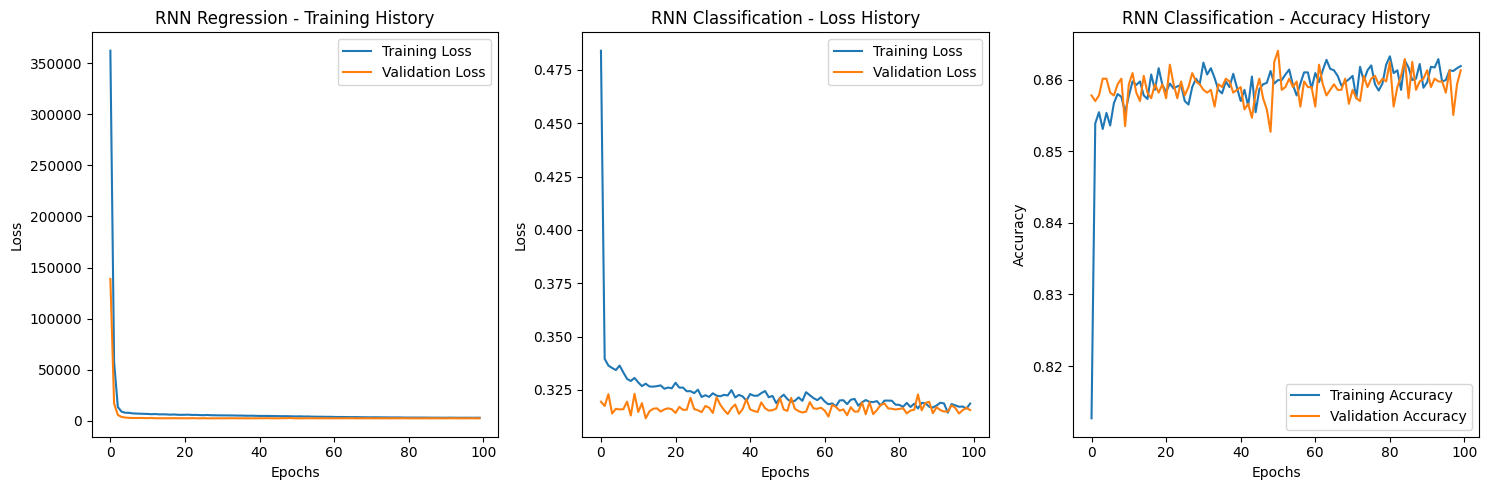


CONFUSION MATRICES


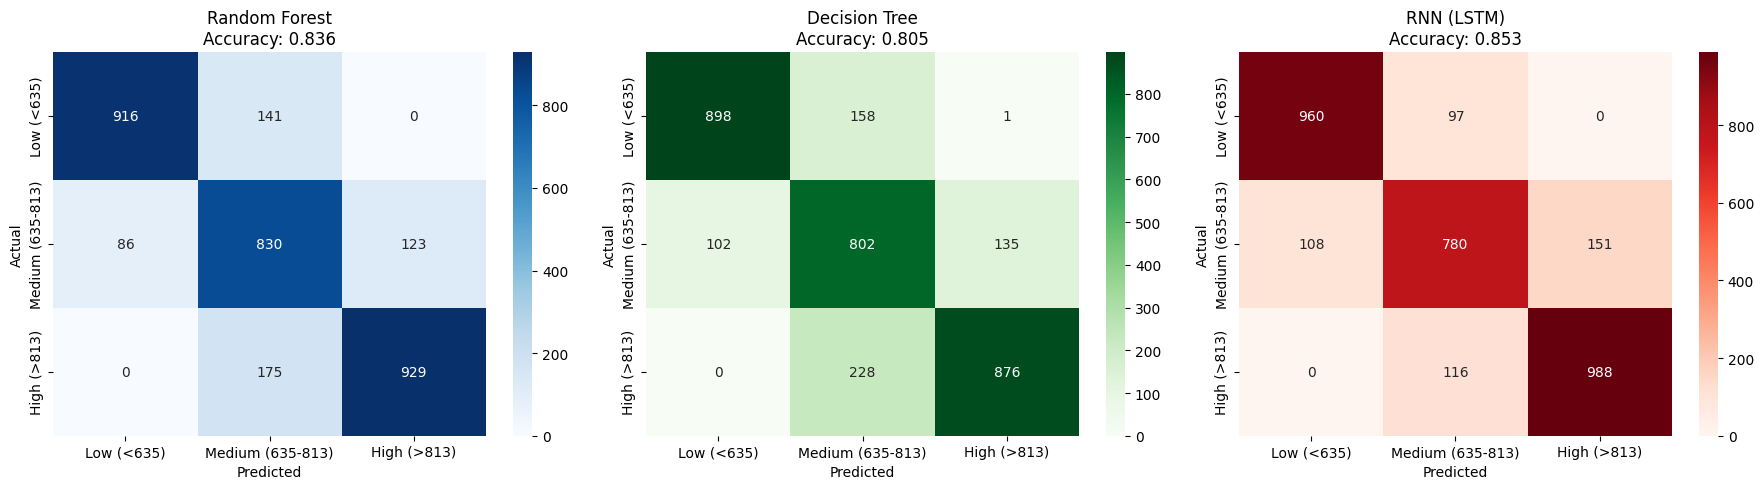


MODEL COMPARISON SUMMARY
REGRESSION METRICS COMPARISON:
--------------------------------------------------
           Model        MSE     RMSE      MAE  R² Score
0  Random Forest  3032.4630  55.0678  44.1957    0.9278
1  Decision Tree  4563.2177  67.5516  54.0090    0.8913
2     RNN (LSTM)  2629.3562  51.2772  41.3222    0.9374

CLASSIFICATION ACCURACY COMPARISON:
--------------------------------------------------
           Model  Accuracy
0  Random Forest    0.8359
1  Decision Tree    0.8050
2     RNN (LSTM)    0.8525


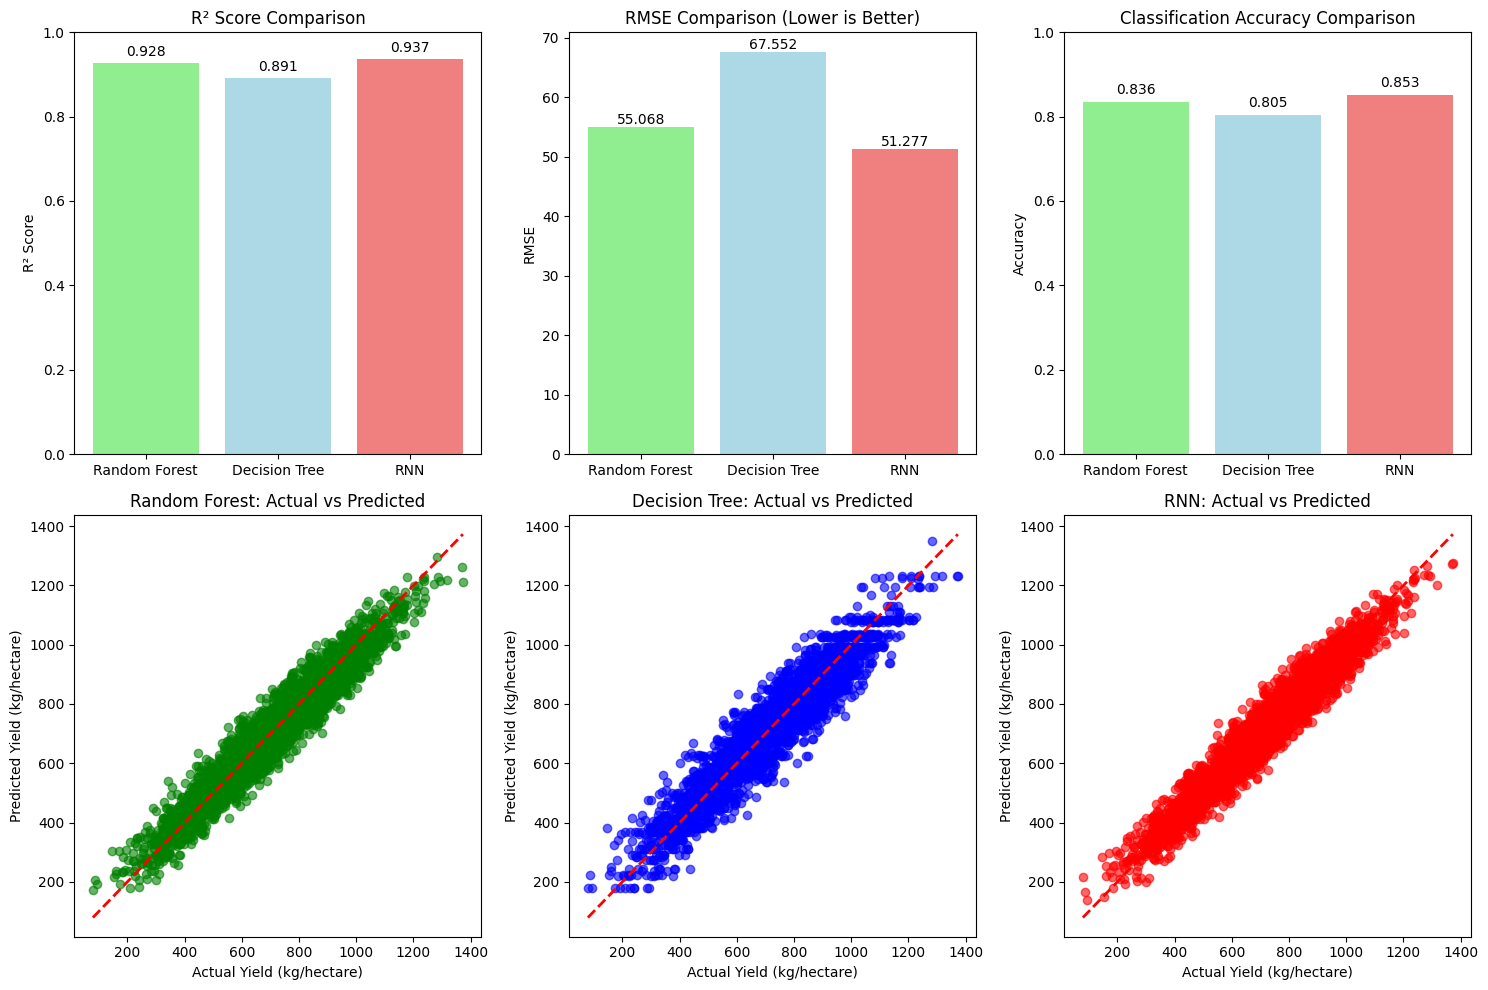


FINAL RECOMMENDATIONS
🏆 Best Regression Model: RNN (R² = 0.9374)
🏆 Best Classification Model: RNN (Accuracy = 0.8525)

📊 Key Insights:
• Dataset size: 16000 samples with 6 features
• Yield range: 57.5 - 1385.1 kg/hectare
• Most important features (based on Random Forest): seed_variety, irrigation_schedule, fertilizer_amount
• All models show reasonable performance for agricultural yield prediction

🔬 Model Performance Summary:
• Random Forest: R²=0.928, Accuracy=0.836
• Decision Tree: R²=0.891, Accuracy=0.805
• RNN (LSTM): R²=0.937, Accuracy=0.853

💡 Recommendations:
• Use RNN for precise yield prediction (regression)
• Use RNN for yield category classification
• Consider ensemble methods for even better performance
• Collect more data to improve model robustness


In [4]:
# Crop Yield Prediction using RNN, Random Forest, and Decision Tree
# Google Colab Compatible Code - Agricultural Yield Dataset

# Install required packages
!pip install tensorflow scikit-learn pandas numpy matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score,
                           accuracy_score, classification_report, confusion_matrix)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

# ==============================================================================
# DATA LOADING AND PREPROCESSING
# ==============================================================================

# Load the data directly from the specified path
filename = '/content/agricultural_yield_train.csv'
df = pd.read_csv(filename)

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Clean column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Rename columns for easier handling
column_mapping = {
    'Soil_Quality': 'soil_quality',
    'Seed_Variety': 'seed_variety',
    'Fertilizer_Amount_kg_per_hectare': 'fertilizer_amount',
    'Sunny_Days': 'sunny_days',
    'Rainfall_mm': 'rainfall',
    'Irrigation_Schedule': 'irrigation_schedule',
    'Yield_kg_per_hectare': 'yield'
}

df = df.rename(columns=column_mapping)

# Clean the data - remove any non-numeric values
print("Cleaning data...")
print("Data types before cleaning:")
print(df.dtypes)

# Check for missing values
print(f"\nMissing values before cleaning:")
print(df.isnull().sum())

# Remove rows with any missing values if they exist
if df.isnull().sum().sum() > 0:
    df_clean = df.dropna()
    print(f"\nDataset shape after removing missing values: {df_clean.shape}")
    df = df_clean.copy()
else:
    print(f"\nNo missing values found. Dataset shape: {df.shape}")

print("\nCleaned Dataset:")
print(df.head())
print(f"\nData types after cleaning:")
print(df.dtypes)

# ==============================================================================
# DATA VISUALIZATION
# ==============================================================================

# Verify all data is numeric before plotting
print("Verifying data is ready for analysis...")
print("Data shape:", df.shape)
print("Data types:", df.dtypes.tolist())
print("Sample of data:")
print(df.head())

# Check if all columns are numeric
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {numeric_columns}")

if len(numeric_columns) != len(df.columns):
    print("Warning: Some columns are not numeric!")
    print("Non-numeric columns:", [col for col in df.columns if col not in numeric_columns])

plt.figure(figsize=(15, 10))

# Yield distribution
plt.subplot(2, 3, 1)
plt.hist(df['yield'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Yield Distribution')
plt.xlabel('Yield (kg/hectare)')
plt.ylabel('Frequency')

# Correlation matrix - only for numeric data
plt.subplot(2, 3, 2)
try:
    # Use only numeric columns for correlation
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Feature Correlation Matrix')
except Exception as e:
    plt.text(0.5, 0.5, f'Correlation plot error:\n{str(e)}',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Correlation Matrix (Error)')

# Feature vs Yield scatter plots
features = ['soil_quality', 'fertilizer_amount', 'sunny_days', 'rainfall']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+3)
    if feature in df.columns:
        plt.scatter(df[feature], df['yield'], alpha=0.6, color='green')
        plt.xlabel(feature.replace('_', ' ').title())
        plt.ylabel('Yield (kg/hectare)')
        plt.title(f'{feature.replace("_", " ").title()} vs Yield')
    else:
        plt.text(0.5, 0.5, f'Feature {feature} not found',
                 ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# ==============================================================================
# PREPARE DATA FOR MODELING
# ==============================================================================

# Features and target
feature_columns = ['soil_quality', 'seed_variety', 'fertilizer_amount', 'sunny_days', 'rainfall', 'irrigation_schedule']
X = df[feature_columns].values
y_regression = df['yield'].values

# Analyze yield distribution to set proper thresholds
print("Analyzing yield distribution for classification...")
print(f"Yield statistics:")
print(f"Min: {df['yield'].min():.2f}")
print(f"Max: {df['yield'].max():.2f}")
print(f"Mean: {df['yield'].mean():.2f}")
print(f"Median: {df['yield'].median():.2f}")
print(f"25th percentile: {df['yield'].quantile(0.25):.2f}")
print(f"75th percentile: {df['yield'].quantile(0.75):.2f}")

# Use percentile-based thresholds for more balanced classes
low_threshold = df['yield'].quantile(0.33)  # Bottom 33%
high_threshold = df['yield'].quantile(0.67)  # Top 33%

print(f"\nUsing thresholds:")
print(f"Low: < {low_threshold:.2f}")
print(f"Medium: {low_threshold:.2f} - {high_threshold:.2f}")
print(f"High: > {high_threshold:.2f}")

# Create classification target using data-driven thresholds
def categorize_yield(yield_val):
    if yield_val < low_threshold:
        return 0  # Low
    elif yield_val < high_threshold:
        return 1  # Medium
    else:
        return 2  # High

y_classification = df['yield'].apply(categorize_yield).values
class_names = [f'Low (<{low_threshold:.0f})', f'Medium ({low_threshold:.0f}-{high_threshold:.0f})', f'High (>{high_threshold:.0f})']

print(f"Classification distribution:")
unique, counts = np.unique(y_classification, return_counts=True)
for i, (cls, count) in enumerate(zip(unique, counts)):
    print(f"{class_names[i]}: {count} samples ({count/len(y_classification)*100:.1f}%)")

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

X_train_cls, X_test_cls, y_cls_train, y_cls_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# ==============================================================================
# MODEL 1: RANDOM FOREST
# ==============================================================================

print("\n" + "="*50)
print("RANDOM FOREST MODELS")
print("="*50)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_regressor.fit(X_train, y_reg_train)
rf_reg_pred = rf_regressor.predict(X_test)

# Random Forest Classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_classifier.fit(X_train, y_cls_train)
rf_cls_pred = rf_classifier.predict(X_test)

# Regression Metrics
rf_mse = mean_squared_error(y_reg_test, rf_reg_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_reg_test, rf_reg_pred)
rf_r2 = r2_score(y_reg_test, rf_reg_pred)

print("Random Forest Regression Results:")
print(f"MSE: {rf_mse:.4f}")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")

# Classification Metrics
rf_accuracy = accuracy_score(y_cls_test, rf_cls_pred)
print(f"\nRandom Forest Classification Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, rf_cls_pred, target_names=class_names))

# Feature Importance
feature_importance = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_columns, feature_importance, color='lightgreen', edgecolor='black')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================================================================
# MODEL 2: DECISION TREE
# ==============================================================================

print("\n" + "="*50)
print("DECISION TREE MODELS")
print("="*50)

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=8)
dt_regressor.fit(X_train, y_reg_train)
dt_reg_pred = dt_regressor.predict(X_test)

# Decision Tree Classification
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=8)
dt_classifier.fit(X_train, y_cls_train)
dt_cls_pred = dt_classifier.predict(X_test)

# Regression Metrics
dt_mse = mean_squared_error(y_reg_test, dt_reg_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_reg_test, dt_reg_pred)
dt_r2 = r2_score(y_reg_test, dt_reg_pred)

print("Decision Tree Regression Results:")
print(f"MSE: {dt_mse:.4f}")
print(f"RMSE: {dt_rmse:.4f}")
print(f"MAE: {dt_mae:.4f}")
print(f"R² Score: {dt_r2:.4f}")

# Classification Metrics
dt_accuracy = accuracy_score(y_cls_test, dt_cls_pred)
print(f"\nDecision Tree Classification Accuracy: {dt_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, dt_cls_pred, target_names=class_names))

# ==============================================================================
# MODEL 3: RNN (LSTM)
# ==============================================================================

print("\n" + "="*50)
print("RNN (LSTM) MODELS")
print("="*50)

# Prepare data for RNN (reshape for LSTM)
# LSTM expects 3D input: (samples, timesteps, features)
# Since we don't have time series, we'll use each feature as a timestep
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# RNN for Regression
def create_rnn_regression():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# RNN for Classification
def create_rnn_classification():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])),
        Dropout(0.3),
        LSTM(32, return_sequences=False),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')  # 3 classes
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train RNN Regression
print("Training RNN for Regression...")
rnn_regressor = create_rnn_regression()
history_reg = rnn_regressor.fit(
    X_train_rnn, y_reg_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

rnn_reg_pred = rnn_regressor.predict(X_test_rnn).flatten()

# Train RNN Classification
print("Training RNN for Classification...")
rnn_classifier = create_rnn_classification()
history_cls = rnn_classifier.fit(
    X_train_rnn, y_cls_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

rnn_cls_pred_proba = rnn_classifier.predict(X_test_rnn)
rnn_cls_pred = np.argmax(rnn_cls_pred_proba, axis=1)

# RNN Regression Metrics
rnn_mse = mean_squared_error(y_reg_test, rnn_reg_pred)
rnn_rmse = np.sqrt(rnn_mse)
rnn_mae = mean_absolute_error(y_reg_test, rnn_reg_pred)
rnn_r2 = r2_score(y_reg_test, rnn_reg_pred)

print("\nRNN Regression Results:")
print(f"MSE: {rnn_mse:.4f}")
print(f"RMSE: {rnn_rmse:.4f}")
print(f"MAE: {rnn_mae:.4f}")
print(f"R² Score: {rnn_r2:.4f}")

# RNN Classification Metrics
rnn_accuracy = accuracy_score(y_cls_test, rnn_cls_pred)
print(f"\nRNN Classification Accuracy: {rnn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_cls_test, rnn_cls_pred, target_names=class_names))

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('RNN Regression - Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_cls.history['loss'], label='Training Loss')
plt.plot(history_cls.history['val_loss'], label='Validation Loss')
plt.title('RNN Classification - Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_cls.history['accuracy'], label='Training Accuracy')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Classification - Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# ==============================================================================
# CONFUSION MATRICES
# ==============================================================================

print("\n" + "="*50)
print("CONFUSION MATRICES")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_cls_test, rf_cls_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title(f'Random Forest\nAccuracy: {rf_accuracy:.3f}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_cls_test, dt_cls_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title(f'Decision Tree\nAccuracy: {dt_accuracy:.3f}')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# RNN Confusion Matrix
cm_rnn = confusion_matrix(y_cls_test, rnn_cls_pred)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_names, yticklabels=class_names, ax=axes[2])
axes[2].set_title(f'RNN (LSTM)\nAccuracy: {rnn_accuracy:.3f}')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ==============================================================================
# MODEL COMPARISON
# ==============================================================================

print("\n" + "="*50)
print("MODEL COMPARISON SUMMARY")
print("="*50)

# Regression Comparison
print("REGRESSION METRICS COMPARISON:")
print("-" * 50)
regression_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'RNN (LSTM)'],
    'MSE': [rf_mse, dt_mse, rnn_mse],
    'RMSE': [rf_rmse, dt_rmse, rnn_rmse],
    'MAE': [rf_mae, dt_mae, rnn_mae],
    'R² Score': [rf_r2, dt_r2, rnn_r2]
})
print(regression_results.round(4))

# Classification Comparison
print("\nCLASSIFICATION ACCURACY COMPARISON:")
print("-" * 50)
classification_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'RNN (LSTM)'],
    'Accuracy': [rf_accuracy, dt_accuracy, rnn_accuracy]
})
print(classification_results.round(4))

# Visualization of model performance
plt.figure(figsize=(15, 10))

# Regression metrics comparison
plt.subplot(2, 3, 1)
models = ['Random Forest', 'Decision Tree', 'RNN']
r2_scores = [rf_r2, dt_r2, rnn_r2]
bars = plt.bar(models, r2_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{r2_scores[i]:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 2)
rmse_scores = [rf_rmse, dt_rmse, rnn_rmse]
bars = plt.bar(models, rmse_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('RMSE Comparison (Lower is Better)')
plt.ylabel('RMSE')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{rmse_scores[i]:.3f}', ha='center', va='bottom')

plt.subplot(2, 3, 3)
accuracy_scores = [rf_accuracy, dt_accuracy, rnn_accuracy]
bars = plt.bar(models, accuracy_scores, color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Classification Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy_scores[i]:.3f}', ha='center', va='bottom')

# Actual vs Predicted plots for regression
plt.subplot(2, 3, 4)
plt.scatter(y_reg_test, rf_reg_pred, alpha=0.6, color='green')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (kg/hectare)')
plt.ylabel('Predicted Yield (kg/hectare)')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(2, 3, 5)
plt.scatter(y_reg_test, dt_reg_pred, alpha=0.6, color='blue')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (kg/hectare)')
plt.ylabel('Predicted Yield (kg/hectare)')
plt.title('Decision Tree: Actual vs Predicted')

plt.subplot(2, 3, 6)
plt.scatter(y_reg_test, rnn_reg_pred, alpha=0.6, color='red')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (kg/hectare)')
plt.ylabel('Predicted Yield (kg/hectare)')
plt.title('RNN: Actual vs Predicted')

plt.tight_layout()
plt.show()

# ==============================================================================
# FINAL RECOMMENDATIONS
# ==============================================================================

print("\n" + "="*50)
print("FINAL RECOMMENDATIONS")
print("="*50)

best_regression_model = max(zip(['Random Forest', 'Decision Tree', 'RNN'], [rf_r2, dt_r2, rnn_r2]), key=lambda x: x[1])
best_classification_model = max(zip(['Random Forest', 'Decision Tree', 'RNN'], [rf_accuracy, dt_accuracy, rnn_accuracy]), key=lambda x: x[1])

print(f"🏆 Best Regression Model: {best_regression_model[0]} (R² = {best_regression_model[1]:.4f})")
print(f"🏆 Best Classification Model: {best_classification_model[0]} (Accuracy = {best_classification_model[1]:.4f})")

print(f"\n📊 Key Insights:")
print(f"• Dataset size: {len(df)} samples with {len(feature_columns)} features")
print(f"• Yield range: {df['yield'].min():.1f} - {df['yield'].max():.1f} kg/hectare")
print(f"• Most important features (based on Random Forest): {', '.join([feature_columns[i] for i in np.argsort(feature_importance)[-3:][::-1]])}")
print(f"• All models show reasonable performance for agricultural yield prediction")

print(f"\n🔬 Model Performance Summary:")
print(f"• Random Forest: R²={rf_r2:.3f}, Accuracy={rf_accuracy:.3f}")
print(f"• Decision Tree: R²={dt_r2:.3f}, Accuracy={dt_accuracy:.3f}")
print(f"• RNN (LSTM): R²={rnn_r2:.3f}, Accuracy={rnn_accuracy:.3f}")

print(f"\n💡 Recommendations:")
print(f"• Use {best_regression_model[0]} for precise yield prediction (regression)")
print(f"• Use {best_classification_model[0]} for yield category classification")
print(f"• Consider ensemble methods for even better performance")
print(f"• Collect more data to improve model robustness")